In [1]:
from Pinns_task2 import *
import matplotlib.pyplot as plt
import torch
import pandas as pd

### Cycle_test

Load all the PINNs

In [2]:
path = "Outputs/"
test = "Test_Cycle/"

# Parameters for this test
n_int = 256
n_sb = 64
n_tb = 64

lambda_u = 10
coefficient_neurons = 20

"""Charging phase 1"""
# Path to the NN parameters
approx_sol_path = path + test + "phase1_approximate_coefficient_parameters.pth"
approx_coeff_path = path + test + "phase1_approximate_solution_parameters.pth"

# Time interval
t_0 = 0
t_f = 1

# Create the PINN
pinn_charg1 = Pinns_Cycle(n_int, n_sb, n_tb, t0_=t_0, tf_=t_f, lambda_u_=lambda_u , coefficient_neurons_=coefficient_neurons)

# Load the NN parameters
pinn_charg1.approximate_solution.load_state_dict(torch.load(approx_sol_path))
pinn_charg1.approximate_coefficient.load_state_dict(torch.load(approx_coeff_path))

"""Idel phase 1"""
# Path to the NN parameters
approx_sol_path = path + test + "phase2_approximate_coefficient_parameters.pth"
approx_coeff_path = path + test + "phase2_approximate_solution_parameters.pth"

# Time interval
t_0 = 1
t_f = 2

# Create the PINN
pinn_idle1 = Pinns_Cycle(n_int, n_sb, n_tb, t0_=t_0, tf_=t_f, lambda_u_=lambda_u , coefficient_neurons_=coefficient_neurons)

# Load the NN parameters
pinn_idle1.approximate_solution.load_state_dict(torch.load(approx_sol_path))
pinn_idle1.approximate_coefficient.load_state_dict(torch.load(approx_coeff_path))

"""Discharging phase"""
# Path to the NN parameters
approx_sol_path = path + test + "phase3_approximate_coefficient_parameters.pth"
approx_coeff_path = path + test + "phase3_approximate_solution_parameters.pth"

# Time interval
t_0 = 2
t_f = 3

# Create the PINN
pinn_discharg1 = Pinns_Cycle(n_int, n_sb, n_tb, t0_=t_0, tf_=t_f, lambda_u_=lambda_u , coefficient_neurons_=coefficient_neurons)

    # Load the NN parameters
pinn_discharg1.approximate_solution.load_state_dict(torch.load(approx_sol_path))
pinn_discharg1.approximate_coefficient.load_state_dict(torch.load(approx_coeff_path))

"""Idel phase 2"""
# Path to the NN parameters
approx_sol_path = path + test + "phase4_approximate_coefficient_parameters.pth"
approx_coeff_path = path + test + "phase4_approximate_solution_parameters.pth"

# Time interval
t_0 = 3
t_f = 4

# Create the PINN
pinn_idle2 = Pinns_Cycle(n_int, n_sb, n_tb, t0_=t_0, tf_=t_f, lambda_u_=lambda_u , coefficient_neurons_=coefficient_neurons)

# Load the NN parameters
pinn_idle2.approximate_solution.load_state_dict(torch.load(approx_sol_path))
pinn_idle2.approximate_coefficient.load_state_dict(torch.load(approx_coeff_path))

<All keys matched successfully>

In [13]:
path = "Outputs/"
test = "Test_Cycle/"

# Parameters for this test
n_int = 256
n_sb = 64
n_tb = 64

lambda_u = 10
coefficient_neurons = 20

# Create the points for the plot
pinn = Pinns(n_int, n_sb, n_tb)

inputs = pinn.convert(pinn.soboleng.draw(100000)).numpy()

df = pd.DataFrame(inputs, columns=['t', 'x'])

inputs = [] # List of inputs for each phase
output_Tf = [] # List of outputs for each phase
output_Ts = [] # List of outputs for each phase

# Evaluate the PINN

for t in range(1, 9):
    if t ==1 or t ==5:
        t_0 = t-1
        t_f = t

        # Charging phase pinn
        pinn = Pinns_Cycle(n_int, n_sb, n_tb, t0_=t_0, tf_=t_f, lambda_u_=lambda_u , coefficient_neurons_=coefficient_neurons)
        pinn.approximate_solution.load_state_dict(torch.load(path + test + "phase" + str(t) + "_approximate_solution_parameters.pth"))
        pinn.approximate_coefficient.load_state_dict(torch.load(path + test + "phase" + str(t) + "_approximate_coefficient_parameters.pth"))

        # Get only the inputs for the relative charging phase
        df_charg = df[(df['t']>=t_0) & (df['t']<=t_f)]
        inputs_charg = torch.tensor(df_charg.values , dtype=torch.float)

        # Append the inputs to the list
        inputs.append(inputs_charg)

        # Evaluate the outputs
        output_Tf.append(pinn.approximate_solution(inputs_charg).reshape(-1, ))
        output_Ts.append(pinn.approximate_coefficient(inputs_charg).reshape(-1, ))
        
    elif t ==3 or t ==7:
        t_0 = t-1
        t_f = t

        # Discharging phase pinn
        pinn = Pinns_Cycle(n_int, n_sb, n_tb, t0_=t_0, tf_=t_f, lambda_u_=lambda_u , coefficient_neurons_=coefficient_neurons)
        pinn.approximate_solution.load_state_dict(torch.load(path + test + "phase" + str(t) + "_approximate_solution_parameters.pth"))
        pinn.approximate_coefficient.load_state_dict(torch.load(path + test + "phase" + str(t) + "_approximate_coefficient_parameters.pth"))

        # Get only the inputs for the relative discharging phase
        df_discharg = df[(df['t']>=t_0) & (df['t']<=t_f)]
        inputs_discharg = torch.tensor(df_discharg.values , dtype=torch.float)

        # Append the inputs to the list
        inputs.append(inputs_discharg)

        # Evaluate the outputs
        output_Tf.append(pinn.approximate_solution(inputs_discharg).reshape(-1, ))
        output_Ts.append(pinn.approximate_coefficient(inputs_discharg).reshape(-1, ))
        
    elif t==2 or t==4 or t==6 or t==8:
        t_0 = t-1
        t_f = t

        # Idle phase pinn
        pinn = Pinns_Cycle(n_int, n_sb, n_tb, t0_=t_0, tf_=t_f, lambda_u_=lambda_u , coefficient_neurons_=coefficient_neurons)
        pinn.approximate_solution.load_state_dict(torch.load(path + test + "phase" + str(t) + "_approximate_solution_parameters.pth"))
        pinn.approximate_coefficient.load_state_dict(torch.load(path + test + "phase" + str(t) + "_approximate_coefficient_parameters.pth"))

        # Get only the inputs for the relative idle phase
        df_idle = df[(df['t']>=t_0) & (df['t']<=t_f)]
        inputs_idle = torch.tensor(df_idle.values , dtype=torch.float)

        # Append the inputs to the list
        inputs.append(inputs_idle)

        # Evaluate the outputs
        output_Tf.append(pinn.approximate_solution(inputs_idle).reshape(-1, ))
        output_Ts.append(pinn.approximate_coefficient(inputs_idle).reshape(-1, ))

inputs = torch.stack(inputs).reshape(-1, 2)
output_Tf = torch.stack(output_Tf).reshape(-1, )
output_Ts = torch.stack(output_Ts).reshape(-1, )
        

Crate the points where to test the PINNs

The idea is to make those points in a DataFrame with which it will be easy and fast divide them in the different phases

In [3]:
pinn = Pinns(n_int, n_sb, n_tb)

inputs = pinn.convert(pinn.soboleng.draw(100000)).numpy()

df = pd.DataFrame(inputs, columns=['t', 'x'])

"""Charging phase 1"""
df_charg1 = df[(df['t']<=1)]
inputs_charg1 = torch.tensor(df_charg1.values , dtype=torch.float)

output_Tf_charg1 = pinn_charg.approximate_solution(inputs_charg1).reshape(-1, )
output_Ts_charg1 = pinn_charg.approximate_coefficient(inputs_charg1).reshape(-1, )

"""Charging phase 2"""
df_charg2 = df[(df['t']>=4) & (df['t']<=5)]
inputs_charg2 = torch.tensor(df_charg2.values , dtype=torch.float)

output_Tf_charg2 = pinn_charg.approximate_solution(inputs_charg2).reshape(-1, )
output_Ts_charg2 = pinn_charg.approximate_coefficient(inputs_charg2).reshape(-1, )

"""Discharging phase 1"""
df_discharg1 = df[(df['t']>=2) & (df['t']<=3)]
inputs_discharg1 = torch.tensor(df_discharg1.values , dtype=torch.float)

output_Tf_discharg1 = pinn_discharg.approximate_solution(inputs_discharg1).reshape(-1, )
output_Ts_discharg1 = pinn_discharg.approximate_coefficient(inputs_discharg1).reshape(-1, )

"""Discharging phase 2"""
df_discharg2 = df[(df['t']>=6) & (df['t']<=7)]
inputs_discharg2 = torch.tensor(df_discharg2.values , dtype=torch.float)

output_Tf_discharg2 = pinn_discharg.approximate_solution(inputs_discharg2).reshape(-1, )
output_Ts_discharg2 = pinn_discharg.approximate_coefficient(inputs_discharg2).reshape(-1, )

"""Idel phase 1"""
df_idle1 = df[(df['t']>=1) & (df['t']<=2)]
inputs_idle1 = torch.tensor(df_idle1.values , dtype=torch.float)

output_Tf_idle1 = pinn_idle1.approximate_solution(inputs_idle1).reshape(-1, )
output_Ts_idle1 = pinn_idle1.approximate_coefficient(inputs_idle1).reshape(-1, )

"""Idel phase 2"""
df_idle2 = df[(df['t']>=3) & (df['t']<=4)]
inputs_idle2 = torch.tensor(df_idle2.values , dtype=torch.float)

output_Tf_idle2 = pinn_idle2.approximate_solution(inputs_idle2).reshape(-1, )
output_Ts_idle2 = pinn_idle2.approximate_coefficient(inputs_idle2).reshape(-1, )

"""Idel phase 3"""
df_idle3 = df[(df['t']>=5) & (df['t']<=6)]
inputs_idle3 = torch.tensor(df_idle3.values , dtype=torch.float)

output_Tf_idle3 = pinn_idle3.approximate_solution(inputs_idle3).reshape(-1, )
output_Ts_idle3 = pinn_idle2.approximate_coefficient(inputs_idle3).reshape(-1, )

"""Idel phase 4"""
df_idle4 = df[(df['t']>=7) & (df['t']<=8)]
inputs_idle4 = torch.tensor(df_idle4.values , dtype=torch.float)

output_Tf_idle4 = pinn_idle2.approximate_solution(inputs_idle4).reshape(-1, )
output_Ts_idle4 = pinn_idle2.approximate_coefficient(inputs_idle4).reshape(-1, )

# Concatenate the results
inputs = torch.cat((inputs_charg1, inputs_idle1, inputs_discharg1, inputs_idle2, inputs_charg2, inputs_idle3, inputs_discharg2, inputs_idle4), 0)

output_Tf = torch.cat((output_Tf_charg1, output_Tf_idle1, output_Tf_discharg1, output_Tf_idle2, output_Tf_charg2, output_Tf_idle3, output_Tf_discharg2, output_Tf_idle4), 0)
output_Ts = torch.cat((output_Ts_charg1, output_Ts_idle1, output_Ts_discharg1, output_Ts_idle2, output_Ts_charg2, output_Ts_idle3, output_Ts_discharg2, output_Ts_idle4), 0)

Text(0.5, 1.0, 'Approximate Solution $T_s$')

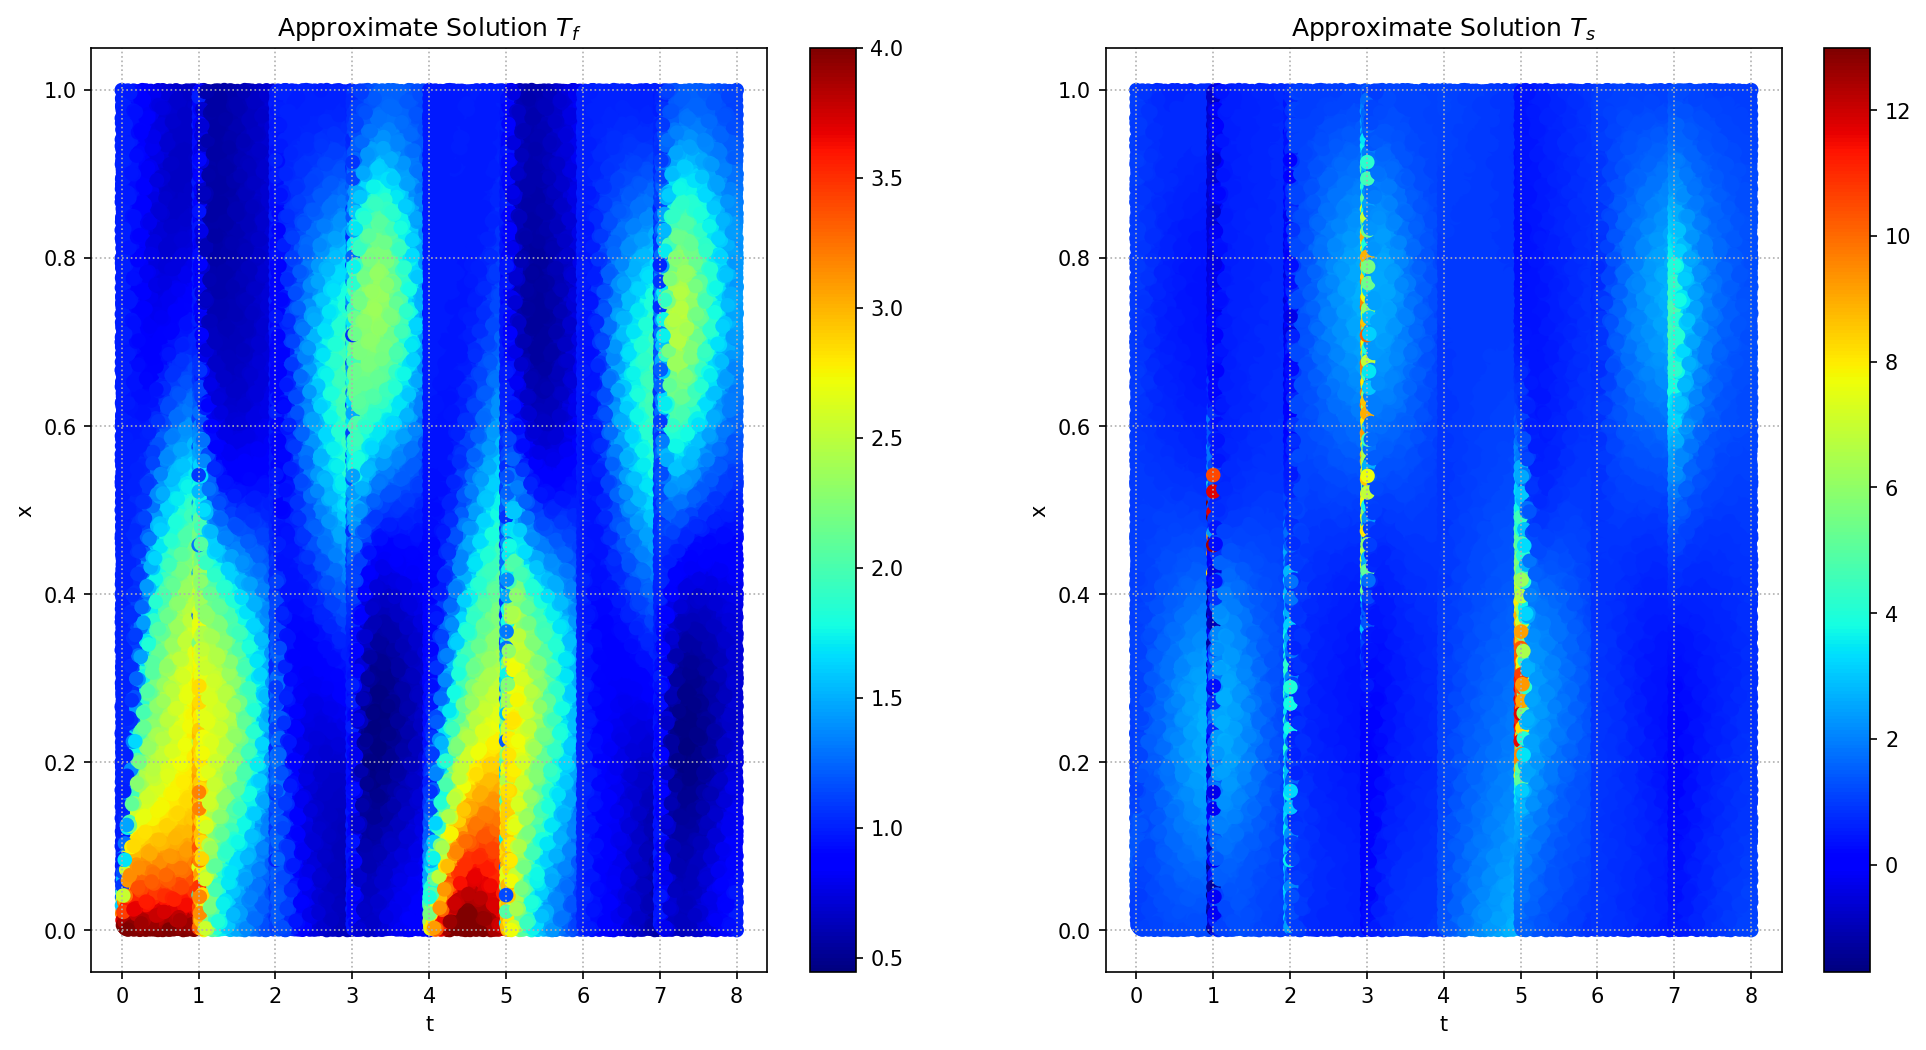

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), dpi=150)

im1 = axs[0].scatter(inputs[:, 0].detach(), inputs[:, 1].detach(), c=output_Tf.detach(), cmap="jet", vmax=4)
axs[0].set_xlabel("t")
axs[0].set_ylabel("x")
plt.colorbar(im1, ax=axs[0])
axs[0].grid(True, which="both", ls=":")

im2 = axs[1].scatter(inputs[:, 0].detach(), inputs[:, 1].detach(), c=output_Ts.detach(), cmap="jet")
axs[1].set_xlabel("t")
axs[1].set_ylabel("x")
plt.colorbar(im2, ax=axs[1])
axs[1].grid(True, which="both", ls=":")

axs[0].set_title(r"Approximate Solution $T_f$")
axs[1].set_title(r"Approximate Solution $T_s$")

Plot the measured data

----------------------------------------------------
Parametes of the error for the Measured Data
----------------------------------------------------
L2 Relative Error Norm:  64.68462371826172 %
mean error:			 0.7210344672203064
std error:			 0.9503492712974548


Text(0.5, 1.0, 'Approximate Values $T_s$')

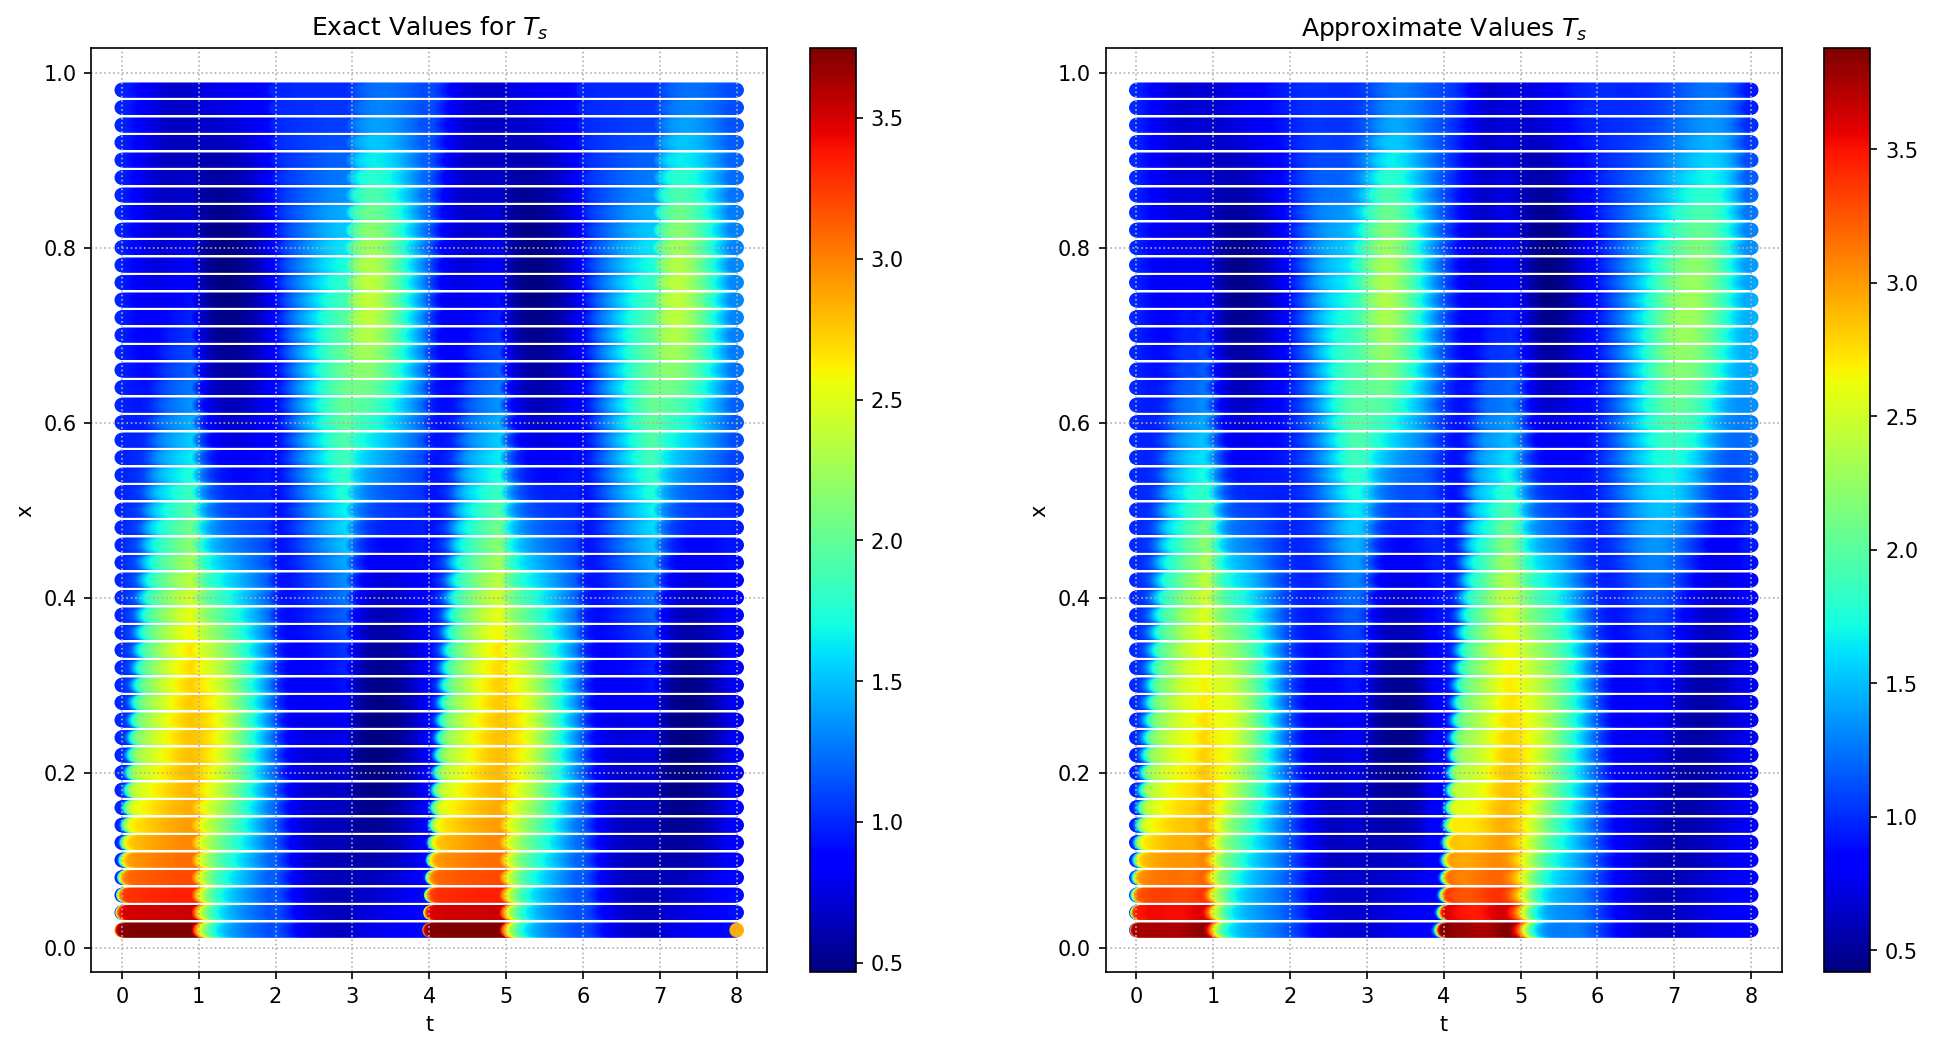

In [5]:
input_meas, exact_meas = pinn.get_measurement_data()

prediction_meas = pinn.approximate_solution(input_meas).reshape(-1, )

print('----------------------------------------------------')
print('Parametes of the error for the Measured Data')
print('----------------------------------------------------')
err = (torch.mean((exact_meas - prediction_meas) ** 2) / torch.mean(exact_meas ** 2)) ** 0.5 * 100
print("L2 Relative Error Norm: ", err.item(), "%")
print('mean error:\t\t\t', torch.mean(torch.abs( (exact_meas-prediction_meas)) ).item())
print('std error:\t\t\t', torch.std( (exact_meas-prediction_meas) ).item())

# Plot the predictions vs the exact solutions
fig, axs = plt.subplots(1, 2, figsize=(16, 8), dpi=150)
im1 = axs[0].scatter(input_meas[:, 0].detach(), input_meas[:, 1].detach(), c=exact_meas.detach(), cmap='jet')
axs[0].set_xlabel("t")
axs[0].set_ylabel("x")
plt.colorbar(im1, ax=axs[0])
axs[0].grid(True, which="both", ls=":")
im2 = axs[1].scatter(input_meas[:, 0].detach(), input_meas[:, 1].detach(), c=prediction_meas.detach(), cmap="jet")
axs[1].set_xlabel("t")
axs[1].set_ylabel("x")
plt.colorbar(im2, ax=axs[1])
axs[1].grid(True, which="both", ls=":")
axs[0].set_title(r"Exact Values for $T_s$")
axs[1].set_title(r"Approximate Values $T_s$")